# ТВиМС Задание 4

## Вариант 14

Проверка статистических гипотез.
Критерии согласия Пирсона, Колмогорова, Мизеса.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
a = 0
b = math.pi / 4

In [4]:
def get_x():
    return  + random.random()*(b-a)

def y_func(x):
    return math.tan(x)

def get_y():
    return y_func(get_x())

In [5]:
def generate_varseries(n):
    ys = []

    for i in range(n):
        ys.append(get_y())

    ys.sort()
    return ys

In [6]:
def Fy_deduced(y):
    if y < 0:
        return 0
    elif y > 1:
        return 1
    else:
        return 4 / math.pi * math.atan(y)

def fy_deduced(y):
    if y < 0 or y > 1:
        return 0
    else:
        return 4 / (math.pi * (1 + y**2))

***

In [7]:
# (copied from second_and_third.ipynb with slight modifications)
def histogram_data_beta(a, b, vs, group_num, normalize=True):
    """Return data needed for type 2 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...

    Примечание: работает только для НСВ с почти-лишь-только-один-раз-встречающимися
    элементами вариационного ряда (здесь вар-ряд = выборка из-за *высокой степени
    уникальности* элементов выборки, т.е. элементы списка 'vs' могут повторяться,
    но это очень маловероятно, если число b-a неотрицательного порядка/
    однозначного отрицательного порядка - порядок условно от -9 до 10+)
    """
    bin_capacity = len(vs) // group_num + (1 if len(vs) % group_num != 0 else 0)

    hdata = [[a, 0]]
    for i in range(len(vs)):
        hdata[-1][1] += 1
        last_bin_empty = False

        # if the last bin is full:
        if hdata[-1][1] == bin_capacity:
            # calculate its right bound:
            if i == len(vs) - 1:
                right_bound = b
            else:
                right_bound = (vs[i] + vs[i+1]) / 2

            # add a new empty bin:
            hdata.append([right_bound, 0])
            last_bin_empty = True

    if last_bin_empty:
        del hdata[-1]

    if normalize:
        square = 0
        for i in range(len(hdata) - 1):
            # calculating local density and updating square:
            hdata[i][1] = hdata[i][1] / (hdata[i+1][0] - hdata[i][0])
            square += hdata[i][1] * (hdata[i+1][0] - hdata[i][0])
        
        hdata[-1][1] = hdata[-1][1] / (b - hdata[-1][0])
        square += hdata[-1][1] * (b - hdata[-1][0])

        for hd in hdata:
            hd[1] /= square
    else:
        for hd in hdata:
            hd[1] /= len(vs)

    hdata.append([b, hdata[-1][1]])
            
    return hdata

***

### Критерий согласия Пирсона

In [8]:
def xi_squared_criteria(a, b, n, group_num, f_hypothesis):
    vs = generate_varseries(n)
    hdata = histogram_data_beta(a, b, vs, group_num, normalize=False) # equiprobable histogram data*

    # * - the method above with normalize=False returns the probablilities of varseries element
    # being in each bin/ interval, i.e. the same value (for equiprobable histogram), except
    # maybe for the last bin/ interval;
    # the sum of hd[1] for hd in hdata should add up to 1.

    hypothesis_ys = [Fy_deduced(hdata[i+1][0]) - Fy_deduced(hdata[i][0])
                     for i in range(group_num)] # getting analytic probabilities for each bin / interval
    histogram_ys = [hd[1] for hd in hdata[:-1]] # getting empirical probabilities for each bin / interval

    # checking this weird condition from bsuir docs:
    assert abs(1 - sum(hypothesis_ys)) <= 0.01

    # calculating the xi squared:
    summands = []
    for i in range(group_num):
        summand = ((histogram_ys[i] - hypothesis_ys[i])**2
                   / (hypothesis_ys[i]))
        summands.append(summand)

    xi_squared = n*sum(summands)
    return xi_squared

In [9]:
# test xi_squared 20 times

for i in range(20):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    print(xi)

17.65901571328073
17.895637860269158
24.14125384151354
21.231676725656243
11.46974269885964
15.570645337205963
17.159993945641656
10.250574308028408
10.32644431131127
25.824940975831908
19.556306012449
28.98112281213363
12.867270389373036
6.9627101492242245
15.786097719808085
18.611433868546484
9.914714790332997
17.385568101296382
18.926994090244943
10.798308235317396


In [10]:
# xi-table data for k = 16:

xi_090 = 23.542
xi_095 = 26.296
xi_099 = 32.000

In [11]:
# how often empirical xi squared is less than xi squared 0.90?

sample_num = 100_000
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_090:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.90 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.95?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_095:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.95 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.99?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_099:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.99 in {answer*100}% of cases.')

Observed xi squared is less than xi squared 0.90 in 90.14% of cases.
Observed xi squared is less than xi squared 0.95 in 94.443% of cases.
Observed xi squared is less than xi squared 0.99 in 98.473% of cases.


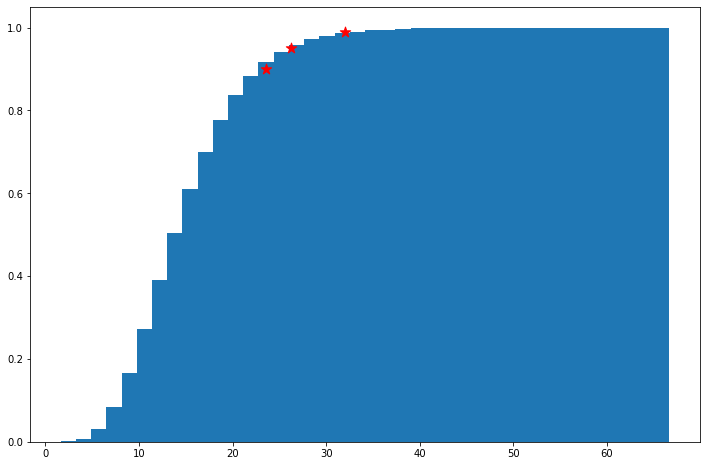

In [12]:
sample_num = 64_000

xis_vs = [xi_squared_criteria(0, 1, 200, 16, fy_deduced) for _ in range(sample_num)]
plt.hist(xis_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([xi_090, xi_095, xi_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Колмогорова

In [13]:
def max_deviation(a, b, vs, Fy_analytic):
    xs = np.linspace(a, b, 1000)
    yas = [Fy_analytic(x) for x in xs] # analytic ys
    yes = [0]*len(xs) # empirical ys

    # calculating empirical:
    current_i = 0
    for (i, x) in enumerate(xs):
        while current_i < len(vs) and x > vs[current_i]:
            current_i += 1
        yes[i] = current_i/len(vs)

    yes = np.array(yes)
    diffs = np.abs(yas - yes) # getting the deviations between analytic and empirical
    
    return max(diffs)

In [14]:
def kolmogorov_lambda_criteria(a, b, n, Fy_analytic):
    vs = generate_varseries(n)
    md = max_deviation(a, b, vs, Fy_analytic)

    return math.sqrt(n)*md

In [15]:
# testing Kolmogorov criteria 20 times:

for _ in range(20):
    kc = kolmogorov_lambda_criteria(0, 1, 30, Fy_deduced)
    print(kc)

0.6070167167790795
0.8182071941262695
0.7265727050634674
0.803105391934102
1.1528116772693038
0.9823445849947414
1.056842539640351
0.6793770410866041
0.641199927208011
0.5890124275915001
0.5647896997143296
1.2504532951622231
0.7884144068742669
0.5987767699594692
0.36222641023599905
0.8354220200834725
0.7064340876543974
0.6191463498560296
0.5338653502963926
0.7606241661938278


In [16]:
# Kolmogorov table data:

klambda_090 = 1.22
klambda_095 = 1.36
klambda_099 = 1.63

In [17]:
# how often empirical lambda is less than lambda 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_090:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.90 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.95?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_095:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.95 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.99?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_099:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.99 in {answer*100}% of cases.')

Observed lambda is less than lambda 0.90 in 90.95% of cases.
Observed lambda is less than lambda 0.95 in 95.66% of cases.
Observed lambda is less than lambda 0.99 in 98.92% of cases.


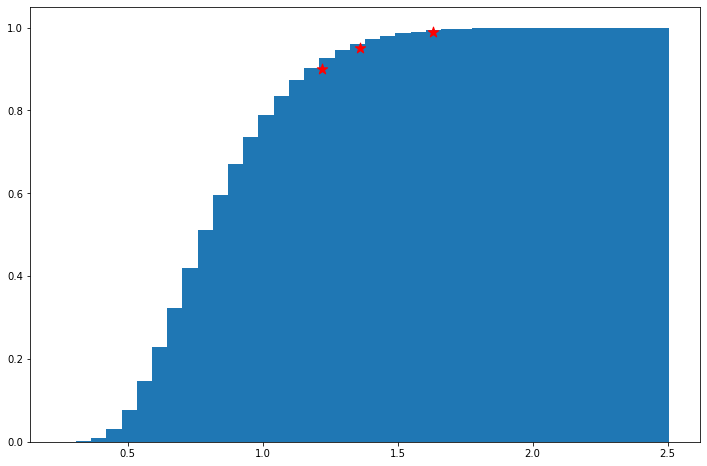

In [18]:
sample_num = 64_000

klambda_vs = [kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced) for _ in range(sample_num)]
plt.hist(klambda_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([klambda_090, klambda_095, klambda_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Мизеса

In [19]:
def mises_omega(a, b, n, Fy_analytic):
    vs = generate_varseries(n)

    n_omega_squared = 0
    n_omega_squared += 1/(12*n)

    for (i, v) in enumerate(vs):
        n_omega_squared += (Fy_analytic(v) - (i-0.5)/n)**2

    return n_omega_squared

In [20]:
# testing Mises criteria 20 times:

for _ in range(20):
    mo = mises_omega(0, 1, 30, Fy_deduced)
    print(mo)

0.1394134128460919
0.18357972776881287
0.09774563783841778
0.23394662932508448
0.03776656117884915
0.08110736621410157
0.1709700423288356
0.10140358823353274
0.10926925053513918
0.4993797650243165
0.16309360418577593
0.06280933034061197
0.07403673544871321
0.5717786340822529
0.2663397235041846
0.12143889296052664
0.13917612073961821
0.2528216114071285
0.30133921051035967
0.044126279856094235


In [21]:
# Mises table data:

momega_090 = 0.347
momega_095 = 0.461
momega_099 = 0.744

In [24]:
# how often empirical omega is less than omega 0.90?

sample_num = 100_000
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_090:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.90 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.95?
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_095:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.95 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.99?
answer = 0
for _ in range(sample_num):
    momega = mises_omega(0, 1, 200, Fy_deduced)
    if momega < momega_099:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.99 in {answer*100}% of cases.')

Observed omega is less than omega 0.90 in 89.381% of cases.
Observed omega is less than omega 0.95 in 94.423% of cases.
Observed omega is less than omega 0.99 in 98.934% of cases.


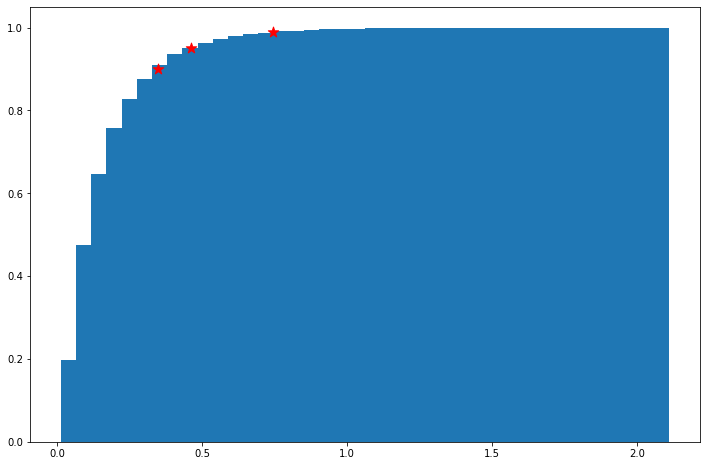

In [23]:
sample_num = 64_000

momega_vs = [mises_omega(0, 1, 200, Fy_deduced) for _ in range(sample_num)]
plt.hist(momega_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([momega_090, momega_095, momega_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()